In [45]:
# Import our dependencies
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Load two csv.
Create Main DataFrame.
Clean Dataframe by replacing Nan and duplicates
Remove war columns that could skew Neural Network

In [46]:
# Create Dataframe for war dataset
url = 'https://raw.githubusercontent.com/brianrwheatley/final-baseball-war-stats/main/Resources/jeffbagwell_war_historical.csv'
war_df = pd.read_csv(url, encoding='latin-1')
war_df.head()


,player_name,age,key_bbref,year_ID,team_ID,stint_ID,lg_ID,is_P,franch_ID,sched,...,gms_RF,gms_OF,gms_DH,gms_PH,gms_PR,prev_tm,arrived,departed,next_tm,salary
0,David Aardsma,22.0,aardsda01,2004,SFG,1,NL,Y,SFG,162,...,0.0,0.0,0.0,0.0,0.0,---,2004,2004,CHC,300000.0
1,David Aardsma,24.0,aardsda01,2006,CHC,1,NL,Y,CHC,162,...,0.0,0.0,0.0,0.0,0.0,SFG,2006,2006,CHW,NaN
2,David Aardsma,25.0,aardsda01,2007,CHW,1,AL,Y,CHW,162,...,0.0,0.0,0.0,0.0,0.0,CHC,2007,2007,BOS,387500.0
3,David Aardsma,26.0,aardsda01,2008,BOS,1,AL,Y,BOS,162,...,0.0,0.0,0.0,0.0,0.0,CHW,2008,2008,SEA,403250.0
4,David Aardsma,27.0,aardsda01,2009,SEA,1,AL,Y,SEA,162,...,0.0,0.0,0.0,0.0,0.0,BOS,2009,2010,NYY,419000.0


In [47]:
# Create seperate Dataframe for injury dataset
url2 = 'https://raw.githubusercontent.com/brianrwheatley/final-baseball-war-stats/finding_injury_length/final_injury_data.csv'
injury_df = pd.read_csv(url2, encoding='latin-1')
injury_df


,Unnamed: 0,Name,Team,Date,Status,injury_length,Injury,location,days_injured,year,shortname
0,0,Brian Johnson,Red Sox,6/15/17,Placed,10-day,shoulder impingement,left,NaN,2017,bjohnson
1,1,Brian Johnson,Red Sox,7/6/17,Activated,10-day,NaN,NaN,21.0,2017,bjohnson
2,2,Brian Johnson,Red Sox,7/8/18,Placed,10-day,hip inflammation,left,NaN,2018,bjohnson
3,3,Brian Johnson,Red Sox,7/15/18,Activated,10-day,NaN,NaN,7.0,2018,bjohnson
4,4,Brian Johnson,Red Sox,4/6/19,Placed,10-day,elbow inflammation,left,NaN,2019,bjohnson
...,...,...,...,...,...,...,...,...,...,...,...
14800,14800,Zack Wheeler,Mets,11/3/17,Activated,60-day,NaN,NaN,102.0,2017,zwheeler
14801,14801,Zack Wheeler,Mets,7/15/19,Placed,10-day,shoulder fatigue,right,NaN,2019,zwheeler
14802,14802,Zack Wheeler,Mets,7/26/19,Activated,10-day,NaN,NaN,11.0,2019,zwheeler
14803,14803,Zoilo Almonte,Yankees,7/20/13,Placed,15-day,sprained ankle,left,NaN,2013,zalmonte


In [48]:
# Filter Dataframe to years in question >=2010
war_df=war_df[war_df.year_ID >=2010]
war_df

,player_name,age,key_bbref,year_ID,team_ID,stint_ID,lg_ID,is_P,franch_ID,sched,...,gms_RF,gms_OF,gms_DH,gms_PH,gms_PR,prev_tm,arrived,departed,next_tm,salary
5,David Aardsma,28.0,aardsda01,2010,SEA,1,AL,Y,SEA,162,...,0.0,0.0,0.0,0.0,0.0,BOS,2009,2010,NYY,2750000.0
6,David Aardsma,30.0,aardsda01,2012,NYY,1,AL,Y,NYY,162,...,0.0,0.0,0.0,0.0,0.0,SEA,2012,2012,NYM,500000.0
7,David Aardsma,31.0,aardsda01,2013,NYM,1,NL,Y,NYM,162,...,0.0,0.0,0.0,0.0,0.0,NYY,2013,2013,ATL,NaN
8,David Aardsma,33.0,aardsda01,2015,ATL,1,NL,Y,ATL,162,...,0.0,0.0,0.0,0.0,0.0,NYM,2015,2015,---,NaN
55,Fernando Abad,24.0,abadfe01,2010,HOU,1,NL,Y,HOU,162,...,0.0,0.0,0.0,0.0,0.0,---,2010,2012,WSN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111976,Mike Zunino,30.0,zuninmi01,2021,TBR,1,AL,N,TBD,162,...,0.0,0.0,0.0,5.0,0.0,SEA,2019,2022,---,2000000.0
111977,Mike Zunino,31.0,zuninmi01,2022,TBR,1,AL,N,TBD,29,...,0.0,0.0,0.0,2.0,0.0,SEA,2019,2022,---,7000000.0
112009,Tony Zych,24.0,zychto01,2015,SEA,1,AL,Y,SEA,162,...,0.0,0.0,0.0,0.0,0.0,---,2015,2017,---,NaN
112010,Tony Zych,25.0,zychto01,2016,SEA,1,AL,Y,SEA,162,...,0.0,0.0,0.0,0.0,0.0,---,2015,2017,---,511000.0


In [49]:
# Combine same year and player in Injury_df
new_injury_df = injury_df.groupby(["Name", "year"]).agg({"Team": "first", "Name": "first", "Team" : "first","injury_length": "first", "Injury": "first", "location": "first", "days_injured" : "first", "year": "first", "shortname": "first"} )
new_injury_df.reset_index(drop=True, inplace=True)
#injury_df.groupby(["Name", "year"])
new_injury_df.to_csv("clean_injury.csv")

In [50]:
new_injury_df

,Team,Name,injury_length,Injury,location,days_injured,year,shortname
0,Pirates,A.J. Burnett,15-day,fractured orbital bone,right,17.0,2012,aburnett
1,Pirates,A.J. Burnett,15-day,strained calf,right,24.0,2013,aburnett
2,Pirates,A.J. Burnett,15-day,elbow inflammation,right,41.0,2015,aburnett
3,Yankees,A.J. Cole,10-day,strained neck,left,12.0,2018,acole
4,Indians,A.J. Cole,10-day,shoulder impingement,right,86.0,2019,acole
...,...,...,...,...,...,...,...,...
6101,Mets,Zack Wheeler,15-day,None,None,212.0,2015,zwheeler
6102,Mets,Zack Wheeler,15-day,None,None,214.0,2016,zwheeler
6103,Mets,Zack Wheeler,10-day,biceps tendinitis,right,10.0,2017,zwheeler
6104,Mets,Zack Wheeler,10-day,shoulder fatigue,right,11.0,2019,zwheeler


In [51]:
# Merge of dataframes to test in machine learning.  
injury_war_df = pd.merge(war_df, new_injury_df, how = 'left', left_on= ['player_name', 'year_ID'], right_on= ["Name", "year"])
injury_war_df

,player_name,age,key_bbref,year_ID,team_ID,stint_ID,lg_ID,is_P,franch_ID,sched,...,next_tm,salary,Team,Name,injury_length,Injury,location,days_injured,year,shortname
0,David Aardsma,28.0,aardsda01,2010,SEA,1,AL,Y,SEA,162,...,NYY,2750000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,David Aardsma,30.0,aardsda01,2012,NYY,1,AL,Y,NYY,162,...,NYM,500000.0,Yankees,David Aardsma,60-day,NaN,NaN,211.0,2012.0,daardsma
2,David Aardsma,31.0,aardsda01,2013,NYM,1,NL,Y,NYM,162,...,ATL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,David Aardsma,33.0,aardsda01,2015,ATL,1,NL,Y,ATL,162,...,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fernando Abad,24.0,abadfe01,2010,HOU,1,NL,Y,HOU,162,...,WSN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18661,Mike Zunino,30.0,zuninmi01,2021,TBR,1,AL,N,TBD,162,...,---,2000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18662,Mike Zunino,31.0,zuninmi01,2022,TBR,1,AL,N,TBD,29,...,---,7000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18663,Tony Zych,24.0,zychto01,2015,SEA,1,AL,Y,SEA,162,...,---,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18664,Tony Zych,25.0,zychto01,2016,SEA,1,AL,Y,SEA,162,...,---,511000.0,Mariners,Tony Zych,15-day,rotator cuff tendinitis in shoulder,right,112.0,2016.0,tzych


In [52]:
# Use dtypes to check column values
injury_war_df.dtypes

player_name      object
age             float64
key_bbref        object
year_ID           int64
team_ID          object
                 ...   
Injury           object
location         object
days_injured    float64
year            float64
shortname        object
Length: 86, dtype: object

In [54]:
# # Drop the non-beneficial and duplicate ID columns, "Name", "player_name", "key_bbref", "franch_ID", "prev_tm", "next_tm", "Unnamed: 0", "Name", "Team", "Date",'shortname', "year", "injury_length", "Status"  .
injury_war_df = injury_war_df.drop(columns=["Name", "player_name", "key_bbref", "franch_ID", "prev_tm", "next_tm", "Name", "Team", 'shortname', "year", "injury_length"])
injury_war_df

,age,year_ID,team_ID,stint_ID,lg_ID,is_P,sched,g_bat,pa,bat162,...,gms_OF,gms_DH,gms_PH,gms_PR,arrived,departed,salary,Injury,location,days_injured
0,28.0,2010,SEA,1,AL,Y,162,4,0,0.000000,...,0.0,0.0,0.0,0.0,2009,2010,2750000.0,NaN,NaN,NaN
1,30.0,2012,NYY,1,AL,Y,162,0,0,0.000000,...,0.0,0.0,0.0,0.0,2012,2012,500000.0,NaN,NaN,211.0
2,31.0,2013,NYM,1,NL,Y,162,41,0,0.000000,...,0.0,0.0,0.0,0.0,2013,2013,NaN,NaN,NaN,NaN
3,33.0,2015,ATL,1,NL,Y,162,30,1,-0.280000,...,0.0,0.0,0.0,0.0,2015,2015,NaN,NaN,NaN,NaN
4,24.0,2010,HOU,1,NL,Y,162,22,1,-0.285000,...,0.0,0.0,0.0,0.0,2010,2012,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18661,30.0,2021,TBR,1,AL,N,162,109,375,16.835000,...,0.0,0.0,5.0,0.0,2019,2022,2000000.0,NaN,NaN,NaN
18662,31.0,2022,TBR,1,AL,N,29,19,64,-17.037931,...,0.0,0.0,2.0,0.0,2019,2022,7000000.0,NaN,NaN,NaN
18663,24.0,2015,SEA,1,AL,Y,162,0,0,0.000000,...,0.0,0.0,0.0,0.0,2015,2017,NaN,NaN,NaN,NaN
18664,25.0,2016,SEA,1,AL,Y,162,0,0,0.000000,...,0.0,0.0,0.0,0.0,2015,2017,511000.0,rotator cuff tendinitis in shoulder,right,112.0


In [55]:
# Replace Nan in injury with none, replace days injured with o, location with none, salary with 0
injury_war_df['Injury'] = injury_war_df['Injury'].replace(np.nan, "none")
injury_war_df['days_injured'] = injury_war_df['days_injured'].replace(np.nan, 0)
injury_war_df['location'] = injury_war_df['location'].replace(np.nan, "none")
injury_war_df['salary'] = injury_war_df['salary'].replace(np.nan, 0)


injury_war_df

,age,year_ID,team_ID,stint_ID,lg_ID,is_P,sched,g_bat,pa,bat162,...,gms_OF,gms_DH,gms_PH,gms_PR,arrived,departed,salary,Injury,location,days_injured
0,28.0,2010,SEA,1,AL,Y,162,4,0,0.000000,...,0.0,0.0,0.0,0.0,2009,2010,2750000.0,none,none,0.0
1,30.0,2012,NYY,1,AL,Y,162,0,0,0.000000,...,0.0,0.0,0.0,0.0,2012,2012,500000.0,none,none,211.0
2,31.0,2013,NYM,1,NL,Y,162,41,0,0.000000,...,0.0,0.0,0.0,0.0,2013,2013,0.0,none,none,0.0
3,33.0,2015,ATL,1,NL,Y,162,30,1,-0.280000,...,0.0,0.0,0.0,0.0,2015,2015,0.0,none,none,0.0
4,24.0,2010,HOU,1,NL,Y,162,22,1,-0.285000,...,0.0,0.0,0.0,0.0,2010,2012,0.0,none,none,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18661,30.0,2021,TBR,1,AL,N,162,109,375,16.835000,...,0.0,0.0,5.0,0.0,2019,2022,2000000.0,none,none,0.0
18662,31.0,2022,TBR,1,AL,N,29,19,64,-17.037931,...,0.0,0.0,2.0,0.0,2019,2022,7000000.0,none,none,0.0
18663,24.0,2015,SEA,1,AL,Y,162,0,0,0.000000,...,0.0,0.0,0.0,0.0,2015,2017,0.0,none,none,0.0
18664,25.0,2016,SEA,1,AL,Y,162,0,0,0.000000,...,0.0,0.0,0.0,0.0,2015,2017,511000.0,rotator cuff tendinitis in shoulder,right,112.0


In [56]:
# Count NaN
count_nan_in_df = injury_war_df.isnull().sum()
print(count_nan_in_df)
# injury_war_df = injury_war_df.dropna()
# injury_war_df

age             0
year_ID         0
team_ID         0
stint_ID        0
lg_ID           0
               ..
departed        0
salary          0
Injury          0
location        0
days_injured    0
Length: 76, dtype: int64


In [57]:
# Print list on NaN columns
injury_war_df.columns[injury_war_df.isna().any()].tolist()

['BB_plus',
 'K_plus',
 'AVG_plus',
 'OBP_plus',
 'SLG_plus',
 'wRC_plus',
 'ISO_plus',
 'BABIP_plus',
 'LD_plus',
 'GB_plus',
 'FB_plus',
 'Pull_plus',
 'Cent_plus',
 'Oppo_plus',
 'g_pitch',
 'starts',
 'relief_pct',
 'avg_LI',
 'fg_pwar162',
 'ra9_pwar162',
 'K9_plus',
 'BB9_plus',
 'KBB_plus',
 'HR9_plus',
 'Kpct_plus',
 'BBpct_plus',
 'oppAVG_plus',
 'WHIP_plus',
 'oppBABIP_plus',
 'LOB_plus',
 'ERA_minus',
 'FIP_minus',
 'xFIP_minus',
 'oppLD_plus',
 'oppGB_plus',
 'oppFB_plus']

In [58]:
# Replace Stats with zero
injury_war_df = injury_war_df.replace(np.nan, 0)

In [59]:
# Print list on NaN columns
injury_war_df.columns[injury_war_df.isna().any()].tolist()

[]

Create if else then statement or function to determine loss/gain/none of WAR162 between rows of same player.  Create a column based on parameter due to findings
  if player and year
2011:4 2012:1 2013:3. go in down stay the same or improve
regression in player or imporvement by year 0, 1
  if x player with y ear then compare that war the next y +1

In [60]:
# Create column if war is above 2 (replacement level of solid starter) to use for x label 
injury_war_df["above_average_war"] = [1 if x >= 2 else 0 for x in injury_war_df["WAR162"]]
injury_war_df.above_average_war.value_counts()

0    15828
1     2838
Name: above_average_war, dtype: int64

In [61]:
# Drop war based categories that skew machine learning
injury_war_df = injury_war_df.drop(columns=["bwar162", "pwar162", "ra9_pwar162", "rep162", "fg_pwar162"])




Check Values of Dataframe.
Bin the injuries and bwar for machine learning

In [62]:
# Check the number of unique values in each column
injury_war_df.nunique()

age                    29
year_ID                13
team_ID                31
stint_ID                5
lg_ID                   2
                     ... 
salary               1976
Injury               1160
location                4
days_injured          240
above_average_war       2
Length: 72, dtype: int64

In [63]:
# Look at Injury value counts for binning

counts = injury_war_df.Injury.value_counts()
counts.to_csv('injury_type.csv')
counts

none                                        13765
strained  hamstring                           356
strained  oblique                             175
 shoulder inflammation                        143
strained  shoulder                            139
                                            ...  
surgery on  elbow to remove loose bodies        1
 tricep injury                                  1
strained / stiffness in lower back              1
strained adductor in  groin                     1
recovering from surgery on  biceps              1
Name: Injury, Length: 1160, dtype: int64

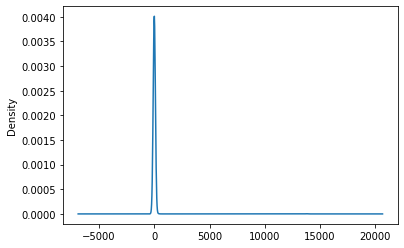

In [64]:
# Visualize the value counts of Notes
counts.plot.density()

In [65]:
 # Determine which values to replace if counts are less than ...?
replace_injury = list(counts[counts <10].index)

# Replace in dataframe
for injury in replace_injury:
     injury_war_df.Injury = injury_war_df.Injury.replace(injury,"Other")
    
# Check to make sure binning was successful
injury_war_df.Injury.value_counts()


none                         13765
Other                         1891
strained  hamstring            356
strained  oblique              175
 shoulder inflammation         143
                             ...  
dislocated  shoulder            10
torn ligament in  thumb         10
strained  pectoral muscle       10
 elbow injury                   10
viral infection                 10
Name: Injury, Length: 80, dtype: int64

Hot Encode categorical Variables.
Create a Seperate Dataframe.
Merge hot encoded dataframe to injury_war_df

In [66]:
# Generate our categorical variable lists
categorical_variable = list(injury_war_df.dtypes[injury_war_df.dtypes == "object"].index)
categorical_variable

['team_ID', 'lg_ID', 'is_P', 'Injury', 'location']

In [67]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(injury_war_df[categorical_variable]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categorical_variable)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,team_ID_ARI,team_ID_ATL,team_ID_BAL,team_ID_BOS,team_ID_CHC,team_ID_CHW,team_ID_CIN,team_ID_CLE,team_ID_COL,team_ID_DET,...,Injury_tightness in forearm,Injury_tightness in lower back,Injury_torn ligament in thumb,Injury_torn meniscus in knee,Injury_undisclosed injury,Injury_viral infection,location_left,location_none,location_right,location_rightleft
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
# Merge one-hot encoded features and drop the originals
injury_war_df = injury_war_df.merge(encode_df,left_index=True,right_index=True).drop(columns = categorical_variable)
injury_war_df

,age,year_ID,stint_ID,sched,g_bat,pa,bat162,bsr162,fld162,pos162,...,Injury_tightness in forearm,Injury_tightness in lower back,Injury_torn ligament in thumb,Injury_torn meniscus in knee,Injury_undisclosed injury,Injury_viral infection,location_left,location_none,location_right,location_rightleft
0,28.0,2010,1,162,4,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,30.0,2012,1,162,0,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31.0,2013,1,162,41,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33.0,2015,1,162,30,1,-0.280000,0.000000,0.000000,0.12000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,2010,1,162,22,1,-0.285000,0.000000,0.000000,0.11500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18661,30.0,2021,1,162,109,375,16.835000,0.730000,4.000000,6.92000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18662,31.0,2022,1,29,19,64,-17.037931,0.418966,1.955172,7.01069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18663,24.0,2015,1,162,0,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18664,25.0,2016,1,162,0,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [69]:
injury_war_df

,age,year_ID,stint_ID,sched,g_bat,pa,bat162,bsr162,fld162,pos162,...,Injury_tightness in forearm,Injury_tightness in lower back,Injury_torn ligament in thumb,Injury_torn meniscus in knee,Injury_undisclosed injury,Injury_viral infection,location_left,location_none,location_right,location_rightleft
0,28.0,2010,1,162,4,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,30.0,2012,1,162,0,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31.0,2013,1,162,41,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33.0,2015,1,162,30,1,-0.280000,0.000000,0.000000,0.12000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24.0,2010,1,162,22,1,-0.285000,0.000000,0.000000,0.11500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18661,30.0,2021,1,162,109,375,16.835000,0.730000,4.000000,6.92000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18662,31.0,2022,1,29,19,64,-17.037931,0.418966,1.955172,7.01069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18663,24.0,2015,1,162,0,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18664,25.0,2016,1,162,0,0,0.000000,0.000000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
# Split our preprocessed data into our features and target arrays
y  = injury_war_df.above_average_war.values
X = injury_war_df.drop(columns="above_average_war").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [71]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

 Compile, Train and Evaluate the Model

In [72]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 20
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               22320     
                                                                 
 dense_1 (Dense)             (None, 80)                9680      
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 36,081
Trainable params: 36,081
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [74]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
438/438 [==============================] - 3s 4ms/step - loss: 0.5584 - accuracy: 0.7273
Epoch 2/100
438/438 [==============================] - 2s 5ms/step - loss: 0.3951 - accuracy: 0.8480
Epoch 3/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8480
Epoch 4/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.8480
Epoch 5/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8480
Epoch 6/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8480
Epoch 7/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3864 - accuracy: 0.8480
Epoch 8/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8480
Epoch 9/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3865 - accuracy: 0.8480
Epoch 10/100
438/438 [==============================] - 1s 3ms/step - loss: 0.3864 - accura

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

205/205 - 0s - loss: 0.4316 - accuracy: 0.8506 - 392ms/epoch - 2ms/step
Loss: 0.4315807521343231, Accuracy: 0.8506255745887756
